In [1]:
## mcl1.ipynb, mcl3.ipynb

In [2]:
import sys                       
sys.path.append('../script/')
from robot import *
from scipy.stats import multivariate_normal
import random #追加
import copy

In [3]:
class Particle:
    def __init__(self, init_pose):
        self.pose = init_pose

In [4]:
class Mcl:  ###Mcl3 (1,2,5行目以降を記載)
    def __init__(self, init_pose, num):
        self.particles = [Particle(init_pose) for i in range(num)]
        
    def draw(self, ax, elems):   #追加
        xs = [p.pose[0] for p in self.particles]
        ys = [p.pose[1] for p in self.particles]
        vxs = [math.cos(p.pose[2]) for p in self.particles] 
        vys = [math.sin(p.pose[2]) for p in self.particles] 
        elems.append(ax.quiver(xs, ys, vxs, vys, color="blue", alpha=0.2))

In [5]:
class EstimationAgent(Agent):  ###EstimationAgent3 (1,2,6,7行目を記載)
    def __init__(self, nu, omega, estimator): 
        super().__init__(nu, omega)
        self.estimator = estimator
        
    def draw(self, ax, elems):   #追加
        self.estimator.draw(ax, elems)

<IPython.core.display.Javascript object>


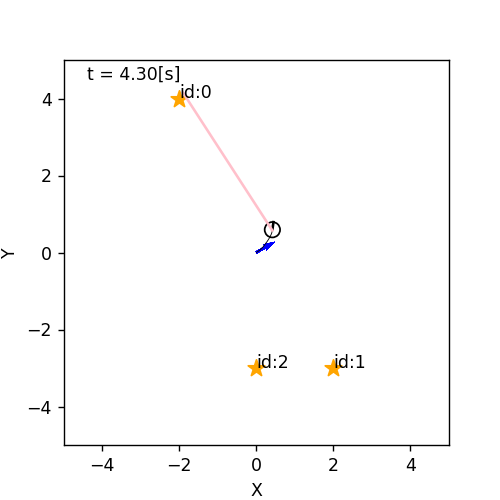

In [7]:
world = World(30, 0.1)  

### 地図を生成して3つランドマークを追加 ###
m = Map()
for ln in [(-2,4), (2,-3), (0,-3)]: m.append_landmark(Landmark(*ln))
world.append(m)          

### ロボットを作る ###
initial_pose = np.array([0, 0, math.pi/6]).T
estimator = Mcl(initial_pose, 100)
circling = EstimationAgent(0.2, 12.0/180*math.pi, estimator) 
r = Robot(initial_pose, sensor=Camera(m), agent=circling) 
world.append(r)

### アニメーション実行 ###
world.draw()